### Election Data Analysis

In [1]:
# Project description: 2012 election analysis, political polls for candidates, donors, etc.

In [2]:
# questions to ask:
# 1. Who were polled? What were their party affiliations?
# 2. Did the poll results favor Obama or Romney?
# 3. How did the undecided voters affect the poll? Can we account for them?
# 4. How did the voter sentiment change over time?
# 5. Did the debates indeed have an impact on the polls?

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from pandas import Series, DataFrame

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
sns.set_style('whitegrid')

In [7]:
% matplotlib inline

In [8]:
from __future__ import division

In [11]:
# data source: HuffPost Pollster

In [12]:
# use the requests module to get some of the data from the web

In [13]:
# use StringIO to work with the csv file

In [10]:
import requests

In [11]:
from StringIO import StringIO

In [12]:
# the url for the poll data csv
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

In [13]:
# use requests to get the data in text form
source = requests.get(url).text

In [14]:
source

u'Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration\nPolitico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000,Likely Voters,Live Phone,47.0,47.0,6.0,,http://elections.huffingtonpost.com/pollster/polls/politico-gwu-battleground-16674,http://www.politico.com/news/stories/1112/83380.html,Nonpartisan,None,,1\nYouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740,Likely Voters,Internet,49.0,47.0,3.0,,http://elections.huffingtonpost.com/pollster/polls/yougov-economist-16733,http://cdn.yougov.com/cumulus_uploads/document/6pkdh10fns/econToplines.pdf,Nonpartisan,None,,1\nGravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872,Likely Voters,Automated Phone,48.0,48.0,4.0,,http://elections.huffingtonpost.com/pollster/polls/gravis-marketing-16681,http://www.gravispolls.com/2012/11/gravis-marketing-national-poll-shows.htm

In [15]:
# use StringIO to avoid I/O error with pandas
poll_data = StringIO(source)

In [16]:
# after we have the data, we import it as dataframe
poll_df = pd.read_csv(poll_data)

In [17]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 77.9+ KB


In [18]:
poll_df.describe()

,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration
count,564.000000,586.000000,586.000000,423.000000,202.000000,0.0,586.0
mean,1296.679078,46.805461,44.614334,6.550827,3.376238,NaN,1.0
std,1621.268369,2.422058,2.906180,3.701754,2.692726,NaN,0.0
min,328.000000,37.000000,32.000000,1.000000,0.000000,NaN,1.0
25%,855.000000,45.000000,43.000000,4.000000,2.000000,NaN,1.0
50%,1000.000000,47.000000,45.000000,6.000000,3.000000,NaN,1.0
75%,1500.000000,48.000000,46.750000,8.000000,4.000000,NaN,1.0
max,36472.000000,54.000000,53.000000,28.000000,19.000000,NaN,1.0


In [19]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


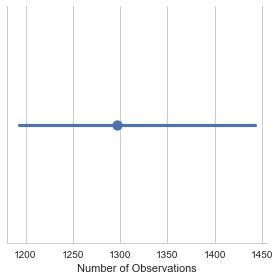

In [20]:
# get a sense on number of observations
sns.factorplot('Number of Observations', data = poll_df)

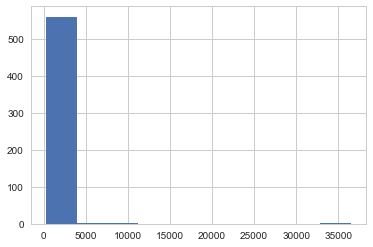

In [21]:
poll_df['Number of Observations'].hist()

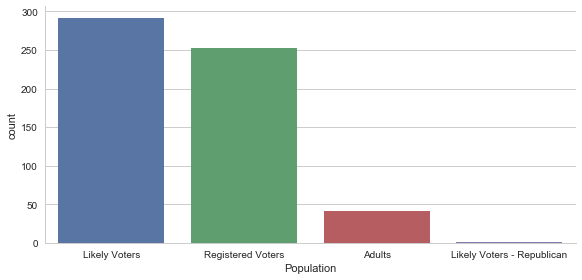

In [22]:
# get a sense of population
sns.factorplot('Population', data = poll_df, kind = 'count', aspect = 2)

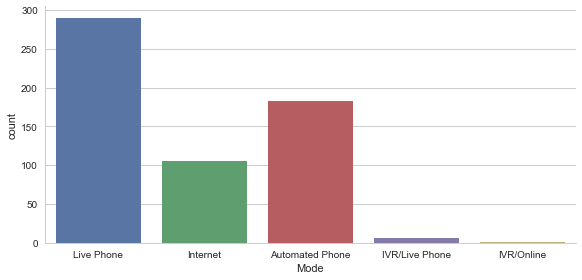

In [23]:
# get a sense of mode
sns.factorplot('Mode', data = poll_df, kind = 'count', aspect = 2)

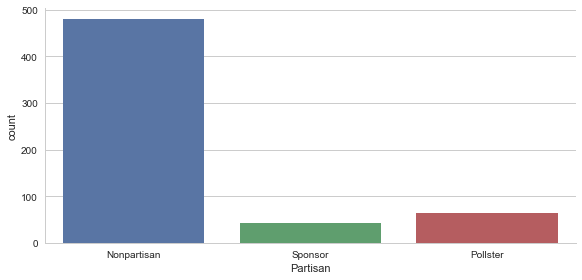

In [24]:
# get a sense of partisan
sns.factorplot('Partisan', data = poll_df, kind = 'count', aspect = 2)

In [42]:
# partisan: 强烈支持者  nonpartisan: 无党派的  pollster: 民意测验者

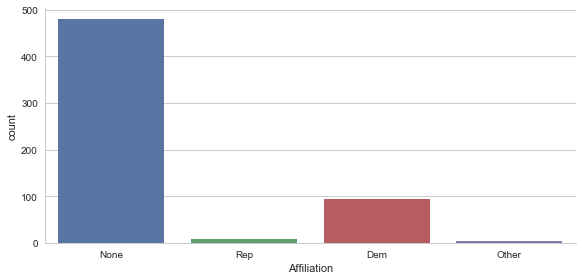

In [25]:
# get a sense of affiliation
sns.factorplot('Affiliation', data = poll_df, kind = 'count', aspect = 2)

In [44]:
# further sort the affiliation by population using "hue"

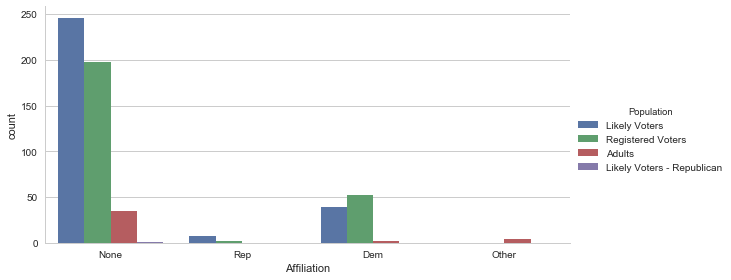

In [26]:
sns.factorplot('Affiliation', data = poll_df, hue = 'Population', kind = 'count', aspect = 2)

In [46]:
# it looks like that we get a strong showing of likely and registered voters, meaning the polls would be a good reflection

In [27]:
# Now let's look at Romney, Obama, and the Undecided data
# get the average
avg = pd.DataFrame(poll_df.mean())

In [28]:
avg

,0
Number of Observations,1296.679078
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238
Question Text,NaN
Question Iteration,1.000000


In [29]:
# remove number of observation data
avg.drop('Number of Observations', axis = 0, inplace = True)

In [30]:
avg.drop('Question Text', axis = 0, inplace = True)

In [31]:
avg.drop('Question Iteration', axis = 0, inplace = True)

In [32]:
avg.drop('Other', axis = 0, inplace = True)

In [33]:
avg

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827


In [34]:
# get the standard deviation
std = pd.DataFrame(poll_df.std())

In [35]:
std.drop('Other', axis = 0, inplace = True)

In [36]:
std.drop('Question Text', axis = 0, inplace = True)

In [37]:
std.drop('Question Iteration', axis = 0, inplace = True)

In [38]:
std.drop('Number of Observations', axis = 0, inplace = True)

In [39]:
std

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754


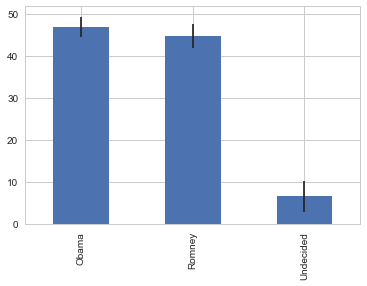

In [40]:
avg.plot(yerr = std, kind = 'bar', legend = False)

In [90]:
# considering the undecided, Obama and Romney are really close

In [91]:
# concatenate avg and std dataframes

In [41]:
poll_avg = pd.concat([avg, std], axis = 1)

poll_avg.columns = ['Average', 'Standard Deviation']

poll_avg

,Average,Standard Deviation
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754


In [42]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [98]:
# do a quick time series analysis using the end date of polls


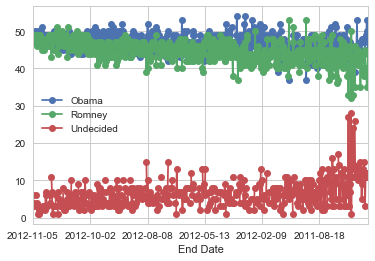

In [43]:
poll_df.plot(x='End Date', y = ['Obama', 'Romney', 'Undecided'], marker = 'o', linestyle = '-')

In [44]:
# another way to plot sentiment vs. time 
# for timestamps
from datetime import datetime

In [45]:
# add a new column to check the difference between Obama and Romney
poll_df['Difference']=(poll_df.Obama - poll_df.Romney)/100

In [46]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


In [47]:
# group the polls by their start date using groupby
poll_df2 = poll_df.groupby(['Start Date'], as_index = False).mean()

In [110]:
poll_df2

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.000000,44.000000,44.000000,12.000000,NaN,NaN,1,0.000000
1,2009-04-17,686.000000,50.000000,39.000000,11.000000,NaN,NaN,1,0.110000
2,2009-05-14,1000.000000,53.000000,35.000000,12.000000,NaN,NaN,1,0.180000
3,2009-06-12,638.000000,48.000000,40.000000,12.000000,NaN,NaN,1,0.080000
4,2009-07-15,577.000000,49.000000,40.000000,11.000000,NaN,NaN,1,0.090000
5,2009-07-18,1000.000000,45.000000,45.000000,3.000000,7.000000,NaN,1,0.000000
6,2009-08-14,956.000000,47.000000,39.000000,13.500000,NaN,NaN,1,0.080000
7,2009-09-21,621.000000,48.000000,39.000000,13.000000,NaN,NaN,1,0.090000
8,2009-10-16,766.000000,48.000000,40.000000,12.000000,NaN,NaN,1,0.080000
9,2009-11-13,1066.000000,48.000000,43.000000,9.000000,NaN,NaN,1,0.050000


In [48]:
poll_df2.tail(100)

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
257,2012-07-07,NaN,43.000000,44.000000,8.000000,NaN,NaN,1,-0.010000
258,2012-07-08,3000.000000,47.000000,45.000000,NaN,NaN,NaN,1,0.020000
259,2012-07-09,1116.333333,46.666667,45.666667,5.500000,NaN,NaN,1,0.010000
260,2012-07-11,942.000000,46.000000,47.000000,5.000000,2.000000,NaN,1,-0.010000
261,2012-07-12,1250.000000,46.500000,45.500000,7.000000,NaN,NaN,1,0.010000
262,2012-07-14,742.000000,47.000000,44.000000,5.000000,NaN,NaN,1,0.030000
263,2012-07-15,1800.333333,45.666667,44.333333,11.000000,2.000000,NaN,1,0.013333
264,2012-07-16,1956.000000,51.000000,41.000000,5.000000,2.000000,NaN,1,0.100000
265,2012-07-18,1250.000000,47.500000,44.500000,3.000000,5.000000,NaN,1,0.030000
266,2012-07-19,1000.000000,46.000000,46.000000,8.000000,NaN,NaN,1,0.000000


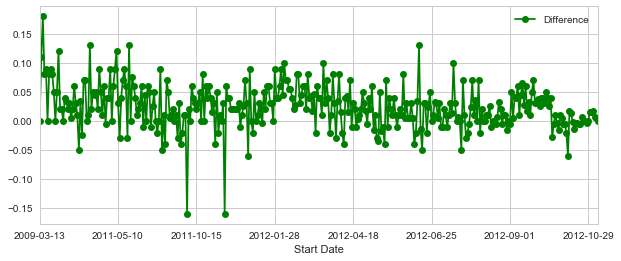

In [49]:
# plot the difference
fig = poll_df2.plot('Start Date', 'Difference', figsize = (10,4), marker = 'o', linestyle = '-', color = 'green')

In [113]:
# zoom in and check the situations of difference on the three debate dates: 10/3/2012, 10/11/2012, 10/22/2012

In [114]:
# plot some lines as markers

In [115]:
# In order to find where to set the x limits for the figure we need to find out where the index for the month of October in 2012 is.

In [50]:
# Set row count and xlimit list
row_index = 0
xlimit = []

# Cycle through dates until 2012-10 is found, then print row index
for date in poll_df2['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_index)
        row_index +=1
    else:
        row_index += 1
        
print min(xlimit)
print max(xlimit)

325
352


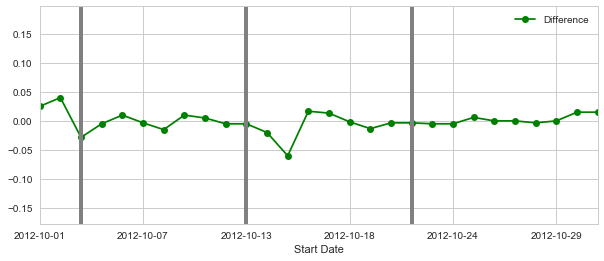

In [51]:
# Start with original figure
fig2 = poll_df2.plot('Start Date','Difference',figsize=(10,4),marker='o',linestyle='-',color='green',xlim=(325,352))

# Now add the debate markers
plt.axvline(x=327, linewidth=4, color='grey')
plt.axvline(x=335, linewidth=4, color='grey')
plt.axvline(x=343, linewidth=4, color='grey')

### Donor Data Set Analysis

In [1]:
# import the donor data set to see where the donations were from and how they affect the campaign. 

In [2]:
# the questions to answer:
# 1.) How much was donated and what was the average donation?
# 2.) How did the donations differ between candidates?
# 3.) How did the donations differ between Democrats and Republicans?
# 4.) What were the demographics of the donors?
# 5.) Is there a pattern to donation amounts?

In [3]:
# Read in the dataset as a dataframe first

In [52]:
donor_df = pd.read_csv('Election_Donor_Data.csv')

C:\Users\Shibo Wang\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [53]:
# get a quick overview
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [17]:
# this dataset has more than 1 million rows, VERY BIG dataset!

In [54]:
# get a closer overview
donor_df.head(5)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [20]:
# We see information on candidates, contributors' names, contributors' cities, contributors' zip codes, 
# their employers, occupations, donation amounts, donation dates, etc. 

In [55]:
# since we care most about the donation amounts, let's do some analysis on that
donor_df['contb_receipt_amt'].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
 2500.00     49005
 35.00       37237
 1000.00     36494
 10.00       33986
 200.00      27813
 20.00       17565
 15.00       16163
 150.00      14600
 75.00       13647
 201.20      11718
 30.00       11381
 300.00      11204
 20.12        9897
 5.00         9024
 40.00        5007
 2000.00      4128
 55.00        3760
 1500.00      3705
 3.00         3383
 60.00        3084
 400.00       3066
-2500.00      2727
 110.00       2554
 125.00       2520
 19.00        2474
             ...  
 174.80          1
 7.27            1
 1219.00         1
 1884.88         1
 162.25          1
 218.31          1
 78.62           1
 203.16          1
 53.11           1
 499.66          1
 19.53           1
 188.60          1
 47.10           1
 19.85           1
 28.83           1
 202.59          1
-5500.00         1
 9.25            1
 202.66          1
 1205.00         1
 80.73           1
 115.07     

In [22]:
# there were 8079 different donor amounts!!

In [56]:
# let's calculate the mean and standard deviation of the donations
don_mean = donor_df['contb_receipt_amt'].mean()

In [57]:
don_mean

298.2351500951093

In [58]:
don_std = donor_df['contb_receipt_amt'].std()

In [59]:
don_std

3749.666723269043

In [60]:
print 'the average donation amount was %.2f with a std of %.2f'%(don_mean, don_std) 

the average donation amount was 298.24 with a std of 3749.67


In [29]:
# we see small mean and huge standard deviation

In [61]:
top_donor = donor_df['contb_receipt_amt'].copy()

In [31]:
top_donor

0           250.0
1            50.0
2           250.0
3           250.0
4           300.0
5           500.0
6           250.0
7           250.0
8           250.0
9           250.0
10          250.0
11          500.0
12          250.0
13          250.0
14          250.0
15          300.0
16          500.0
17         1000.0
18          250.0
19          300.0
20          500.0
21          250.0
22         2500.0
23         2500.0
24          150.0
25          200.0
26          100.0
27          250.0
28          500.0
29          250.0
            ...  
1001701    2500.0
1001702    2500.0
1001703   -2500.0
1001704   -2500.0
1001705    1000.0
1001706    2500.0
1001707   -2500.0
1001708    2500.0
1001709   -2500.0
1001710   -2500.0
1001711    1000.0
1001712    2500.0
1001713    2500.0
1001714     250.0
1001715     250.0
1001716    1000.0
1001717     100.0
1001718    2500.0
1001719    2500.0
1001720     100.0
1001721     250.0
1001722     100.0
1001723     100.0
1001724     500.0
1001725   

In [62]:
top_donor.sort_values() 

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
33821       -5414.31
908565      -5115.00
456649      -5000.00
574657      -5000.00
30513       -5000.00
562267      -5000.00
30584       -5000.00
86268       -5000.00
708920      -5000.00
665887      -5000.00
708899      -5000.00
708929      -5000.00
21172       -5000.00
21168       -5000.00
21167       -5000.00
262328      -5000.00
946875      -5000.00
7361        -5000.00
416403      -5000.00
21164       -5000.00
707945      -5000.00
615101      -5000.00
7973        -5000.00
54430       -5000.00
54434       -5000.00
             ...    
708022      10000.00
708898      10000.00
710177      10000.00
876244      10000.00
709608      10000.00
708919      10000.00
709739      10000.00
91145       10000.00
708138      10000.00
993178      10000.00
709813      10000.00
710730      10000.00
708928      10000.00
709268      10000.00
99829       10000.00
90076       10000.00
709859      1

In [63]:
top_donor.value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
 2500.00     49005
 35.00       37237
 1000.00     36494
 10.00       33986
 200.00      27813
 20.00       17565
 15.00       16163
 150.00      14600
 75.00       13647
 201.20      11718
 30.00       11381
 300.00      11204
 20.12        9897
 5.00         9024
 40.00        5007
 2000.00      4128
 55.00        3760
 1500.00      3705
 3.00         3383
 60.00        3084
 400.00       3066
-2500.00      2727
 110.00       2554
 125.00       2520
 19.00        2474
             ...  
 174.80          1
 7.27            1
 1219.00         1
 1884.88         1
 162.25          1
 218.31          1
 78.62           1
 203.16          1
 53.11           1
 499.66          1
 19.53           1
 188.60          1
 47.10           1
 19.85           1
 28.83           1
 202.59          1
-5500.00         1
 9.25            1
 202.66          1
 1205.00         1
 80.73           1
 115.07     

In [36]:
# most people donated $100 and whole numbers, much more than decimal points 

In [37]:
# get rid of the negative donation amounts

In [64]:
top_donor = top_donor[top_donor > 0] 

In [65]:
top_donor

0           250.0
1            50.0
2           250.0
3           250.0
4           300.0
5           500.0
6           250.0
7           250.0
8           250.0
9           250.0
10          250.0
11          500.0
12          250.0
13          250.0
14          250.0
15          300.0
16          500.0
17         1000.0
18          250.0
19          300.0
20          500.0
21          250.0
22         2500.0
23         2500.0
24          150.0
25          200.0
26          100.0
27          250.0
28          500.0
29          250.0
            ...  
1001696    1000.0
1001697    1500.0
1001698    2500.0
1001699    2500.0
1001700     300.0
1001701    2500.0
1001702    2500.0
1001705    1000.0
1001706    2500.0
1001708    2500.0
1001711    1000.0
1001712    2500.0
1001713    2500.0
1001714     250.0
1001715     250.0
1001716    1000.0
1001717     100.0
1001718    2500.0
1001719    2500.0
1001720     100.0
1001721     250.0
1001722     100.0
1001723     100.0
1001724     500.0
1001725   

In [40]:
# most people made donations for amounts under 3000, let's make a histogram to see where donations concentrate

In [66]:
pop_don = top_donor[top_donor < 3000]

In [67]:
pop_don

0           250.0
1            50.0
2           250.0
3           250.0
4           300.0
5           500.0
6           250.0
7           250.0
8           250.0
9           250.0
10          250.0
11          500.0
12          250.0
13          250.0
14          250.0
15          300.0
16          500.0
17         1000.0
18          250.0
19          300.0
20          500.0
21          250.0
22         2500.0
23         2500.0
24          150.0
25          200.0
26          100.0
27          250.0
28          500.0
29          250.0
            ...  
1001695     625.0
1001696    1000.0
1001697    1500.0
1001698    2500.0
1001699    2500.0
1001700     300.0
1001701    2500.0
1001702    2500.0
1001705    1000.0
1001706    2500.0
1001708    2500.0
1001711    1000.0
1001712    2500.0
1001713    2500.0
1001714     250.0
1001715     250.0
1001716    1000.0
1001717     100.0
1001718    2500.0
1001719    2500.0
1001720     100.0
1001721     250.0
1001722     100.0
1001723     100.0
1001724   

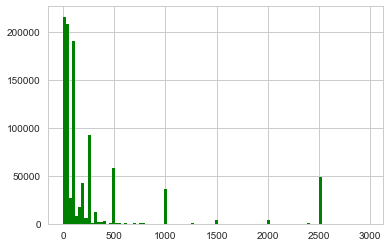

In [68]:
pop_don.hist(bins = 100, color = 'green')

In [69]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [70]:
# let's look into the donations by candidates

In [71]:
candidates = donor_df['cand_nm'].unique()

In [72]:
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [73]:
# check the party affiliations
party_map = {'Bachmann, Michelle':'Republican', 
             'Romney, Mitt': 'Republican', 
             'Obama, Barack':'Democrat',
       "Roemer, Charles E. 'Buddy' III":'Republican', 
             'Pawlenty, Timothy': 'Republican',
       'Johnson, Gary Earl': 'Republican', 
             'Paul, Ron': 'Republican', 
             'Santorum, Rick': 'Republican', 
             'Cain, Herman':'Republican',
       'Gingrich, Newt':'Republican', 
             'McCotter, Thaddeus G':'Republican', 
             'Huntsman, Jon':'Republican',
       'Perry, Rick':'Republican'}

In [74]:
party_map

{'Bachmann, Michelle': 'Republican',
 'Cain, Herman': 'Republican',
 'Gingrich, Newt': 'Republican',
 'Huntsman, Jon': 'Republican',
 'Johnson, Gary Earl': 'Republican',
 'McCotter, Thaddeus G': 'Republican',
 'Obama, Barack': 'Democrat',
 'Paul, Ron': 'Republican',
 'Pawlenty, Timothy': 'Republican',
 'Perry, Rick': 'Republican',
 "Roemer, Charles E. 'Buddy' III": 'Republican',
 'Romney, Mitt': 'Republican',
 'Santorum, Rick': 'Republican'}

In [75]:
# map the party with candidates
donor_df['Party']=donor_df.cand_nm.map(party_map)

In [76]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [77]:
# clean the donor_df dataframe by removing those entries with refunds, i.e., donation < 0

In [78]:
donor_df=donor_df[donor_df.contb_receipt_dt > 0]

In [79]:
# let's check the donation data grouped by each candidate

In [80]:
donor_df.groupby('cand_nm').count()

,cmte_id,cand_id,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
cand_nm,,,,,,,,,,,,,,,,
"Bachmann, Michelle",13140,13140,13140,13139,13140,13140,9860,12995,13140,13140,14,0,0,13140,13140,13140
"Cain, Herman",20107,20107,20107,20107,20107,20107,19504,19806,20107,20107,44,26,22,20107,20107,20107
"Gingrich, Newt",47679,47679,47679,47678,47679,47678,47525,47530,47679,47679,1401,1149,1626,47679,47679,47679
"Huntsman, Jon",4156,4156,4156,4154,4156,4153,4086,4119,4156,4156,185,139,215,4156,4156,4156
"Johnson, Gary Earl",1234,1234,1234,1234,1234,1234,1170,1232,1234,1234,0,0,0,1234,1234,1234
"McCotter, Thaddeus G",74,74,74,74,74,74,62,63,74,74,0,0,0,74,74,74
"Obama, Barack",593746,593746,593746,593742,593742,593705,589476,589375,593746,593746,3765,86444,87481,593746,593746,593746
"Paul, Ron",143757,143757,143757,143757,143757,143721,142817,142561,143757,143757,772,268,348,143757,143757,143757
"Pawlenty, Timothy",4555,4555,4555,4555,4555,4555,4198,4199,4555,4555,1206,733,918,4555,4555,4555


In [81]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13140
Cain, Herman                       20107
Gingrich, Newt                     47679
Huntsman, Jon                       4156
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  74
Obama, Barack                     593746
Paul, Ron                         143757
Pawlenty, Timothy                   4555
Perry, Rick                        13575
Roemer, Charles E. 'Buddy' III      5920
Romney, Mitt                      107229
Santorum, Rick                     46559
Name: contb_receipt_amt, dtype: int64

In [82]:
# Obama has the most number of donations among the candidates

In [83]:
# now let's compare the total amounts of donations for each candidate

In [84]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.677435e+06
Cain, Herman                      7.047265e+06
Gingrich, Newt                    1.201183e+07
Huntsman, Jon                     3.204350e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.703000e+04
Obama, Barack                     1.335026e+08
Paul, Ron                         2.072257e+07
Pawlenty, Timothy                 4.255054e+06
Perry, Rick                       1.841151e+07
Roemer, Charles E. 'Buddy' III    3.674575e+05
Romney, Mitt                      8.521925e+07
Santorum, Rick                    1.072809e+07
Name: contb_receipt_amt, dtype: float64

In [85]:
# Obama also leads in terms of the sum amount of donations

In [86]:
# just make it read a little better

In [87]:
cand_don = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

In [88]:
cand_don # a Series

cand_nm
Bachmann, Michelle                2.677435e+06
Cain, Herman                      7.047265e+06
Gingrich, Newt                    1.201183e+07
Huntsman, Jon                     3.204350e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.703000e+04
Obama, Barack                     1.335026e+08
Paul, Ron                         2.072257e+07
Pawlenty, Timothy                 4.255054e+06
Perry, Rick                       1.841151e+07
Roemer, Charles E. 'Buddy' III    3.674575e+05
Romney, Mitt                      8.521925e+07
Santorum, Rick                    1.072809e+07
Name: contb_receipt_amt, dtype: float64

In [89]:
cand_don.index[0]

'Bachmann, Michelle'

In [90]:
cand_don.index[4]

'Johnson, Gary Earl'

In [92]:
counter = 0

for don in cand_don:
    print 'The candidate %s raised %.0f dollars of donations.' %(cand_don.index[counter], don)
    print '\n'
    counter += 1

The candidate Bachmann, Michelle raised 2677435 dollars of donations.


The candidate Cain, Herman raised 7047265 dollars of donations.


The candidate Gingrich, Newt raised 12011832 dollars of donations.


The candidate Huntsman, Jon raised 3204350 dollars of donations.


The candidate Johnson, Gary Earl raised 566962 dollars of donations.


The candidate McCotter, Thaddeus G raised 37030 dollars of donations.


The candidate Obama, Barack raised 133502591 dollars of donations.


The candidate Paul, Ron raised 20722567 dollars of donations.


The candidate Pawlenty, Timothy raised 4255054 dollars of donations.


The candidate Perry, Rick raised 18411512 dollars of donations.


The candidate Roemer, Charles E. 'Buddy' III raised 367458 dollars of donations.


The candidate Romney, Mitt raised 85219249 dollars of donations.


The candidate Santorum, Rick raised 10728090 dollars of donations.




In [93]:
# plot it to visualize the difference in donations among candidates

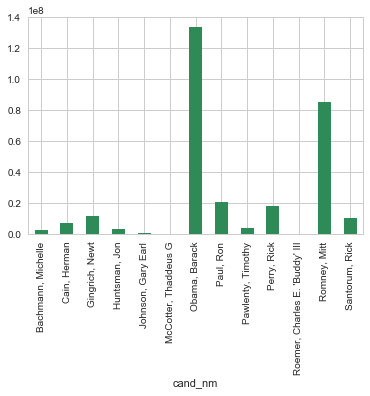

In [96]:
cand_don.plot(kind = 'bar', color = 'seagreen')

In [97]:
# how about total donations of Democrats vs. Republican?

In [99]:
donor_df.groupby('Party')

In [100]:
donor_df

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
5,C00410118,P20002978,"Bachmann, Michelle","BECKMAN, JAMES",SPRINGDALE,AR,7.27647e+08,NONE,RETIRED,500.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
6,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
7,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
8,C00410118,P20002978,"Bachmann, Michelle","COLLINS, SARAH",MESA,AZ,8.52107e+08,ST. JOSEPH HOSPITAL,RN,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
9,C00410118,P20002978,"Bachmann, Michelle","COLEMAN, RONALD",TUCSON,AZ,8.57499e+08,RAYTHEON,ELECTRICAL ENGINEER,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [102]:
donor_df.groupby('Party')['contb_receipt_amt'].sum()

Party
Democrat      1.335026e+08
Republican    1.652488e+08
Name: contb_receipt_amt, dtype: float64

In [103]:
# plot it up

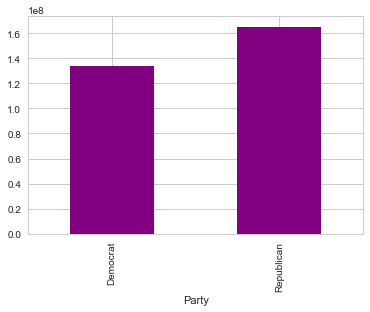

In [104]:
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind = 'bar', color = 'purple')

In [105]:
# look further into who the donors are (their occupation)

In [106]:
donor_df.groupby('contbr_occupation')['contb_receipt_amt'].sum()

contbr_occupation
   MIXED-MEDIA ARTIST / STORYTELLER       100.00
 AREA VICE PRESIDENT                      250.00
 RESEARCH ASSOCIATE                       100.00
 TEACHER                                  500.00
 THERAPIST                               3900.00
'MIS MANAGER                              177.60
(PART-TIME) SALES CONSULTANT & WRITER     285.00
(RETIRED)                                 250.00
-                                        7114.80
--                                         75.00
.NET PROGRAMMER                           481.00
0                                          20.00
07/13/1972                                 98.00
100% DISABLED ARMY VET                    350.00
100% DISABLED VETERAN                    2080.78
100% DISABLED VIET NAM COMBAT VETER       100.00
100% DISABLED VIETNAM VETERAN             236.25
11B                                       300.00
12K ADVOCATE                              150.00
13B CANNON CREWMEMBER                      71.80
13

In [107]:
donor_df.pivot_table('contb_receipt_amt', index = 'contbr_occupation', columns = 'Party', aggfunc = 'sum')

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
'MIS MANAGER,NaN,177.60
(PART-TIME) SALES CONSULTANT & WRITER,NaN,285.00
(RETIRED),NaN,250.00
-,5000.0,2114.80


In [108]:
occupation_df = donor_df.pivot_table('contb_receipt_amt', index = 'contbr_occupation', columns = 'Party', aggfunc = 'sum')

In [110]:
occupation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45073 entries,    MIXED-MEDIA ARTIST / STORYTELLER to ~
Data columns (total 2 columns):
Democrat      29168 non-null float64
Republican    21087 non-null float64
dtypes: float64(2)
memory usage: 1.0+ MB


In [112]:
occupation_df.shape

(45073, 2)

In [114]:
#  small donations of 20 dollars by one type of occupation won't give us too much insight. Do some cut-off.

In [117]:
occupation_df=occupation_df[occupation_df.sum(1) > 1000000]

In [118]:
occupation_df

Party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11126932.97,7.343540e+06
BANKER,224084.40,1.238819e+06
BUSINESS OWNER,449979.30,1.286532e+06
C.E.O.,1690.00,2.431528e+06
CEO,2069784.79,1.501157e+06
CHAIRMAN,495547.00,1.196048e+06
CONSULTANT,2459812.71,2.472815e+06
ENGINEER,950425.55,1.780102e+06
EXECUTIVE,1355161.05,3.918557e+06


In [119]:
occupation_df.shape

(31, 2)

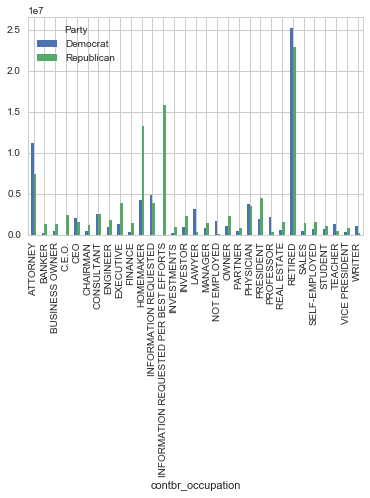

In [120]:
# plot it up
occupation_df.plot(kind= 'bar')

In [121]:
# retired people made the most donations

In [122]:
# not quite readable, switch the plot in the horizontal direction

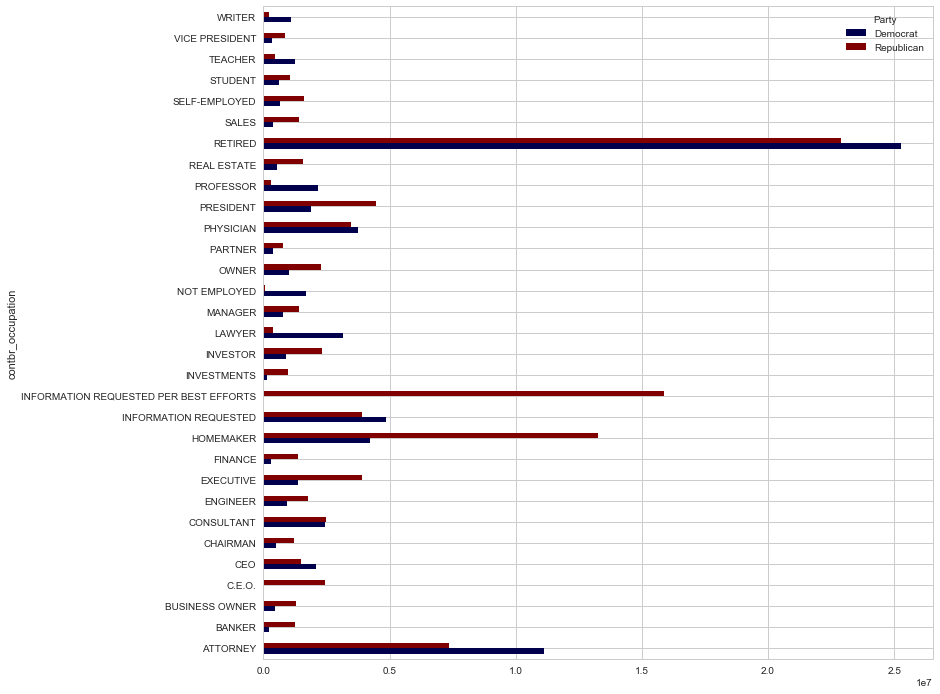

In [123]:
occupation_df.plot(kind= 'barh', figsize = (12,12), cmap = 'seismic')

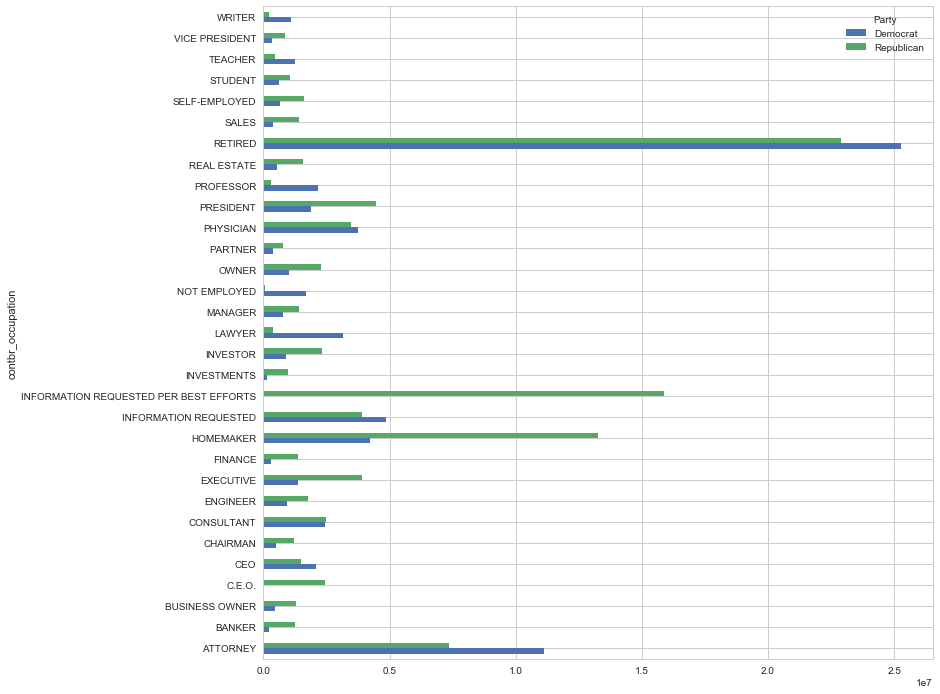

In [124]:
occupation_df.plot(kind= 'barh', figsize = (12,12))

In [125]:
# drop the invalid occupations:

In [126]:
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS', 'INFORMATION REQUESTED'], axis = 0,  inplace = True)

C:\Users\Shibo Wang\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


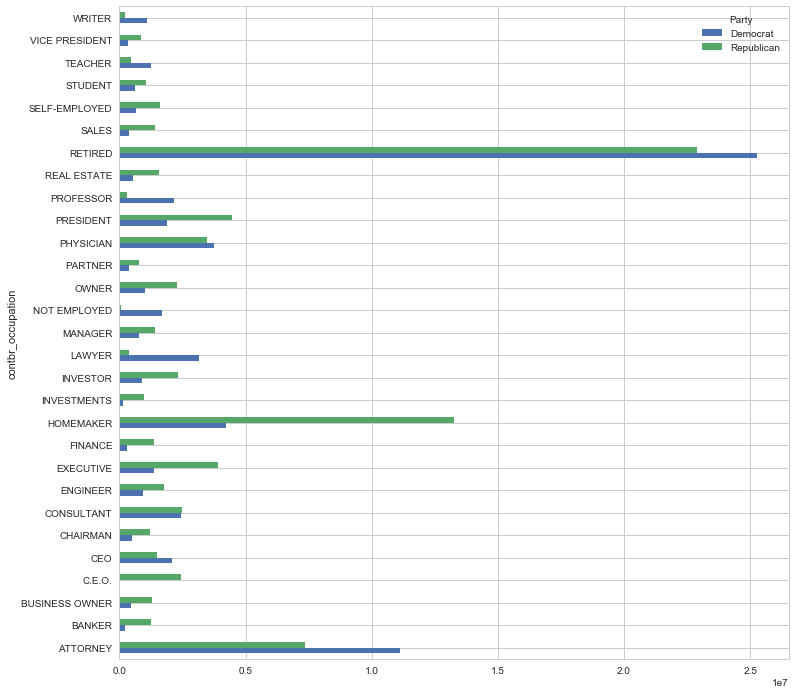

In [127]:
occupation_df.plot(kind= 'barh', figsize = (12,12))

In [128]:
# CEO and C.E.O. are the same and need to be combined

In [130]:
# Set new ceo row as sum of the current two
occupation_df.loc['CEO']=occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']

In [131]:
occupation_df.drop(['C.E.O.'], inplace = True)

In [132]:
occupation_df

Party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11126932.97,7.343540e+06
BANKER,224084.40,1.238819e+06
BUSINESS OWNER,449979.30,1.286532e+06
CEO,2071474.79,3.932686e+06
CHAIRMAN,495547.00,1.196048e+06
CONSULTANT,2459812.71,2.472815e+06
ENGINEER,950425.55,1.780102e+06
EXECUTIVE,1355161.05,3.918557e+06
FINANCE,294031.40,1.369990e+06


In [133]:
# the plot can be refined and finalized.

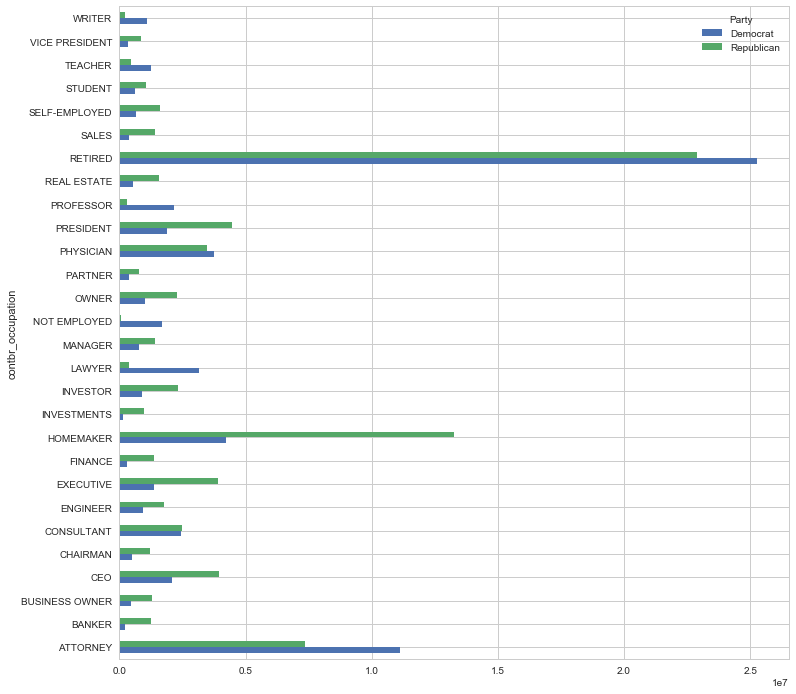

In [134]:
occupation_df.plot(kind= 'barh', figsize = (12,12))